# Trabajo práctico de laboratorio N°1

## 13/06/2024

### Autor: Martín Hernan Deleón

## Consignas del trabajo

Para esta práctica se requeria el cálculo y armado de un filtro a elección. En mi caso se eligió el filtro Notch. Cabe destacar que la confección y diseño del mismo se realizo en conjunto con Nicolas Albano, no asi la redacción de este informe.

### Requerimientos del filtro

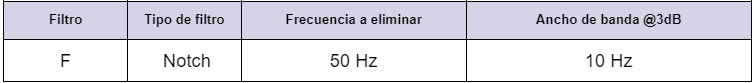

De estos requerimientos observamos que se pide que tenga un ancho de banda de 10Hz y una atenuación máxima en la banda de paso de 3dB. Como no se especifican más requerimientos se asume que el filtro sera de 2do orden, ya qye solo hay una frecuencia a eliminar. Ademas como se pide una atenuacion de 3dB, la normalización del mismo es tribial. Sin embargo se calcularan los parámetros del filtro analiticamente se adjuntaran en el anexo.

### Deducción de la transferencia

Partiendo del conociemiento adquirido en el pasado cuatrimestre, sabemos que la transferencia tiene que tener el siguiente aspecto:

\begin {equation}
    T(s) = \frac{s^2 + \omega_0^2}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}
\end {equation}

En donde:

 $ \omega_0 = 2 \pi * 50 Hz $
 
 $ Q = \frac{f0}{delta f} = \frac{50}{10} $

 Y delta f es el ancho de banda.



### Simulación en Python

En esta sección procedo a realizar la simulación en python de la transferencia obtenida, ploteando la respuesta en modulo y fase de la misma, ademas del mapa o diagrama de polos y ceros con el retardo de grupo como complemento, apesar de que este ultimo no es algo que podamos controlar en este tipo de filtros.

In [1]:

from pytc2.sistemas_lineales import analyze_sys,pretty_print_lti, tf2sos_analog,pretty_print_SOS
from pytc2.general import print_subtitle
from scipy import signal as sig
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys
import math


#### Notch_ord_2_rip_at=1rad/seg

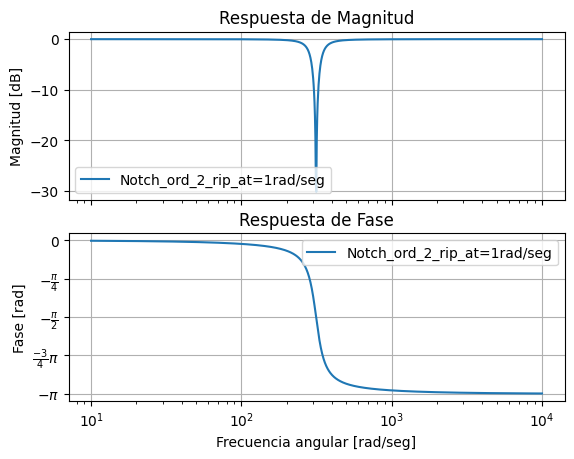

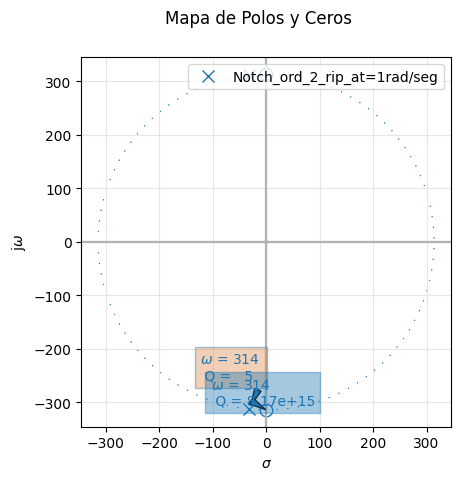

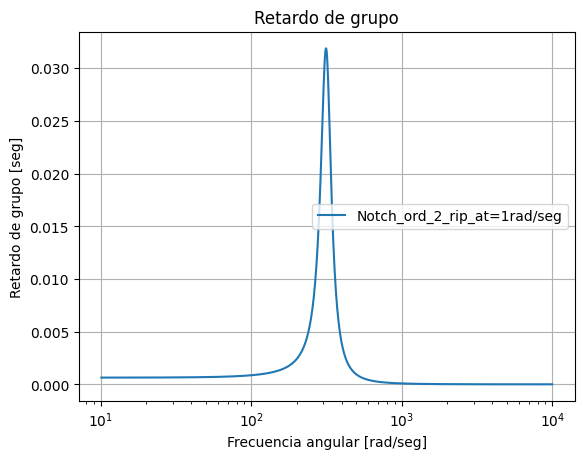

In [2]:
Q=5
norma=2*math.pi*50

num_notch= [1.0 , 0, (norma)**2]
den_notch=[1.0, norma/Q , (norma)**2]

filter_names = []
all_sys=[]

n=2

this_aprox= 'Notch'
this_label=this_aprox + '_ord_' + str(n) + '_rip_' +'at=1rad/seg'


filter_names.append(this_label)
all_sys.append(sig.TransferFunction(num_notch,den_notch))

analyze_sys(all_sys,filter_names)

print_subtitle(this_label)

### Sintesis del circuito

Para poder confeccionar este filtro se utilizara el circuito integrado que nos brindo la facultad. Este es el UAF42, el cual en su interior contiene 4 amplificadores operacionales con algunas conexiones internas que hacen que este circuito sea ideal para la implementación de filtros. En nuestro caso el mismo fabricante brinda información sobre como utilizar el 4to amplificador operacional para confeccionar un filtro Notch. Ademas hay que destacar que este integrado cuenta con capacitores de tolerancias muy bajas, lo cual permite ajustar los parámetros del filtro utilizando compenentes externos.
En la siguiente imágen se observa el esquemático brindado por el fabricante:

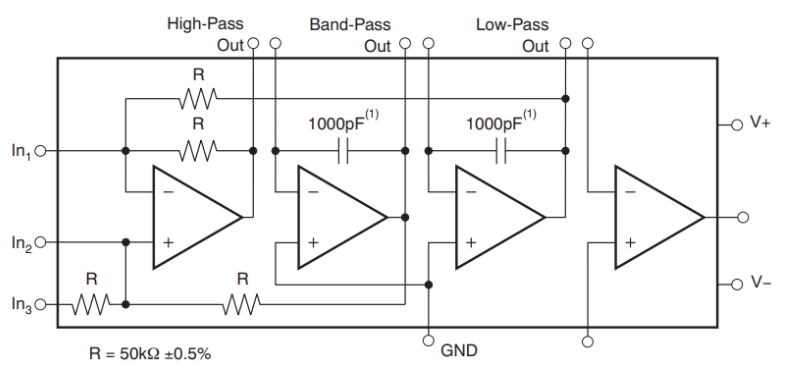

Como podemos ver este integrado cuenta con salidas pasabajos(LPF), otra pasaaltos(HPF) y una pasabanda(BPF). Dejando libre el cuarto operacional, que utilizaremos como sumador de dos de sus salidas. Si nosotros sumamos la salida LPF y la HPF, obtendremos en la salida del cuarto operacional un filtro Notch.
Para esto el fabricante propone la siguiente configuración para llevar adelante este filtro:

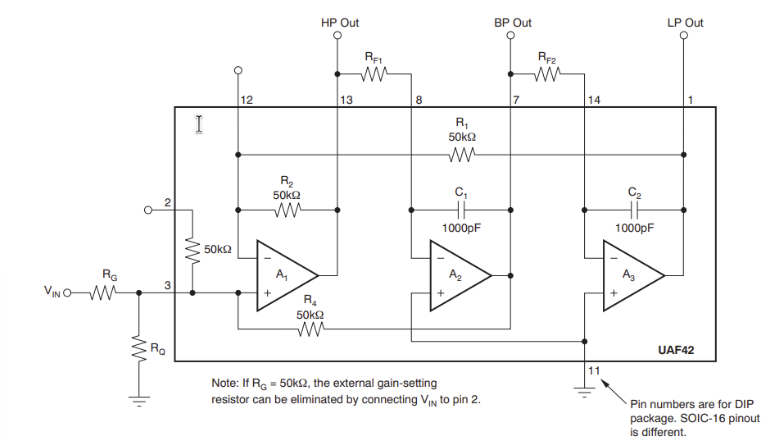

Tambien nos entrega ecuaciones de diseño, las cuales utilizamos para no tener que evaluar la transferencia de todo el circuito.

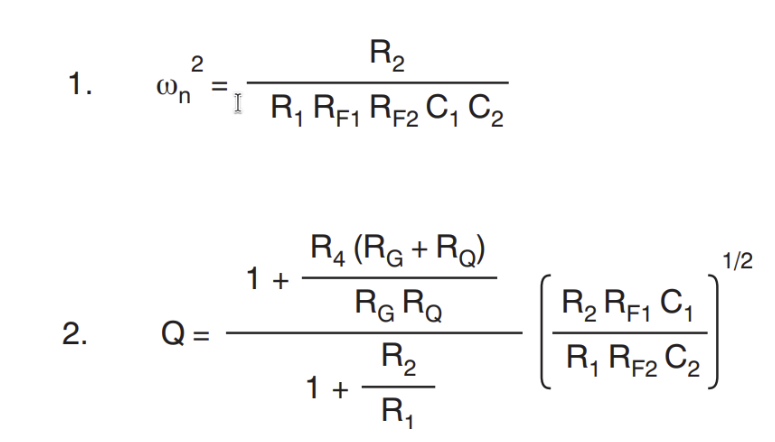

Mediante estas ecuaciones llegamos a los siguientes valores de componentes:




PONER LAS ECUACIONES DE LAS RESISTENCIAS.

### Simulación en LTspice

En esta seccion se simulará el circuito utilizando LTspice, para ello copiamos el esquematico propuesto por el fabricante y pusimos los valores de las resistencias calculados anteriormente, luego de esto obtuvimos el siguiente circuito:

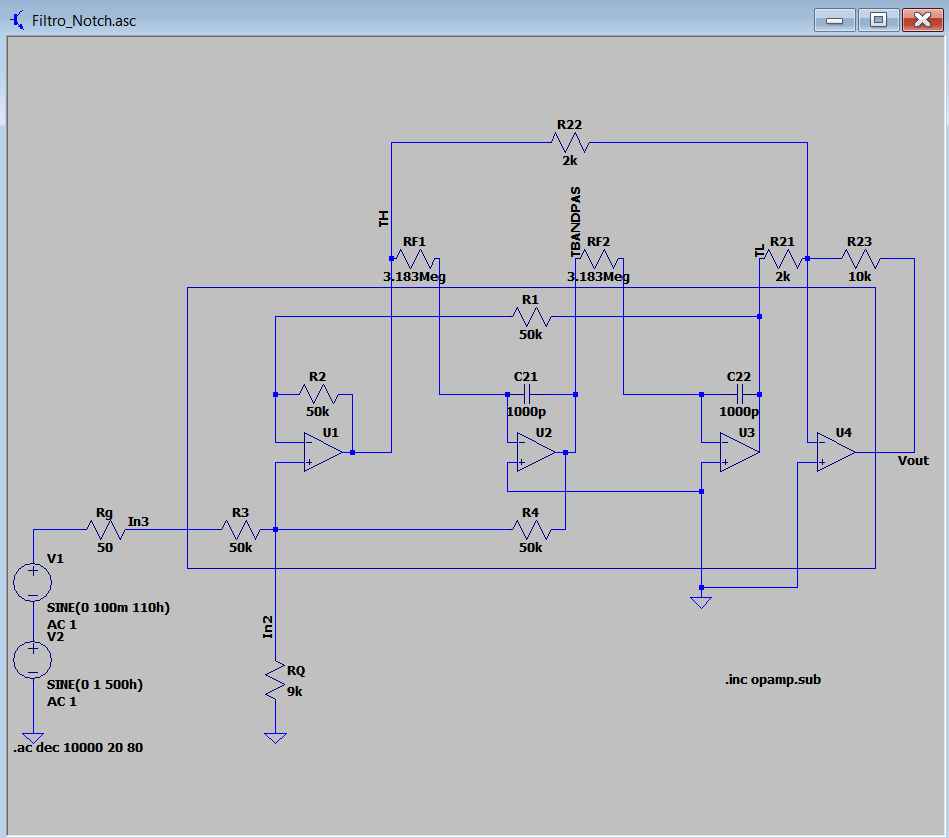

Se puede ver que se trató de copiar la forma en la que el fabricante presenta el esquematico, esto es para evitar errores en las conexiones y poder hacer una inspección visual del mismo.
Luego procedemos a realizar un análisis en frecuencia del filtro mediante el comando ".ac" obteniendo la siguiente respuesta:

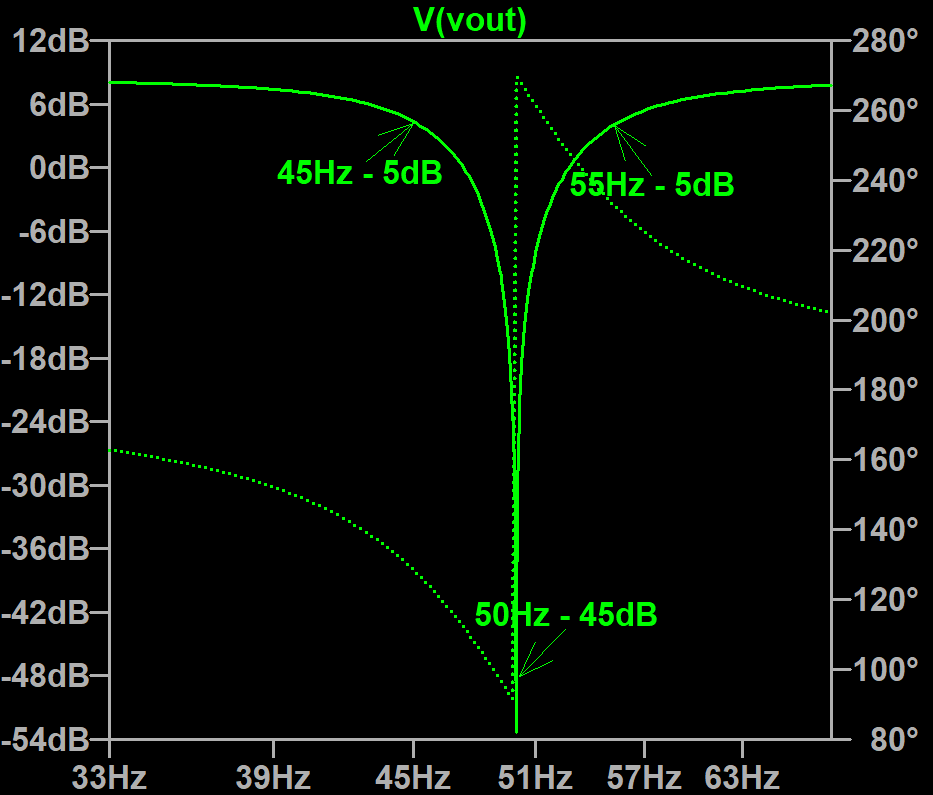

En esta imágen podemos ver que dejamos el filtro con ganancia, si bien esta se puede ajustar mediante un atenuador en la salida. Tambien parece que la fase no seria la que corresponde pero esto se debe al zoom de la imágen.

#### Simulación con UAF42

Procedemos a simular nuevamente el circuito implementando el modelo del integrado. Para eso cargamos los archivos correspondientes, algo que llevo más trabajo de lo pensado, por lo que no detallaré el procedimento dado que sera bastante extenso.
Mediante las directivas de spice configuramos el valor de los capacitores y las resistencias internas del integrado. Por ultimo copiamos el circuito anteriormente simulado, de esta manera obtenemos el siguiente circuito:

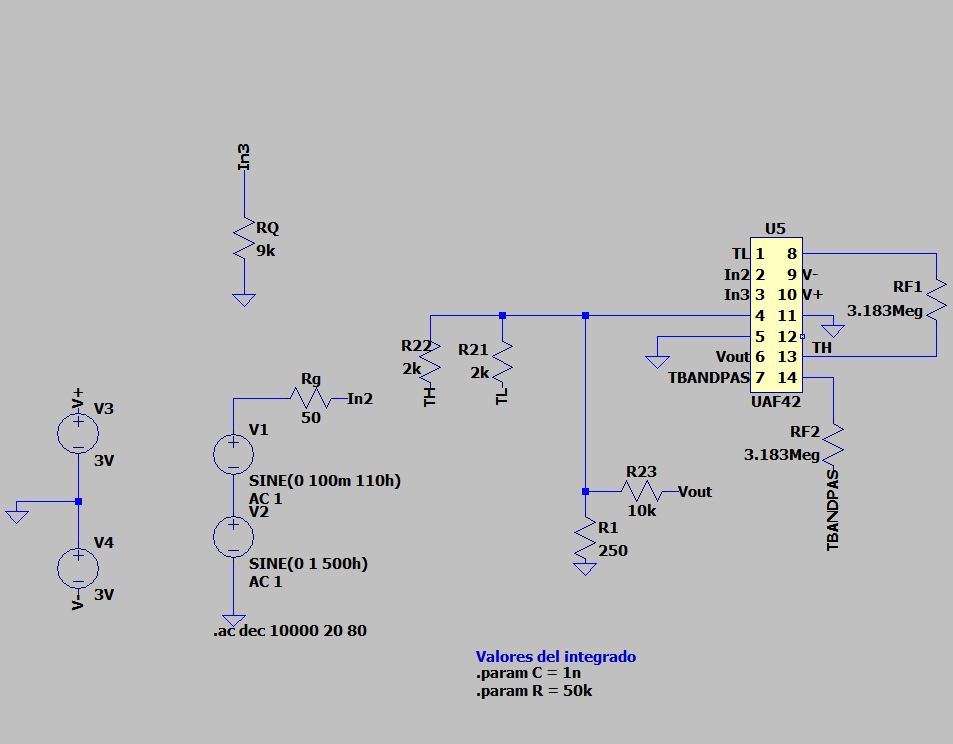

En la proxima imágen podemos ver el resultado de la simulación, en donde la única diferencia con la simulación anterior es la atenuación. Podemos ver que en este caso estamos en 0dB. Esto lo logramos utilizando el opAmp adicional en configuración amplificador no inversor, conformado por las resistencias R23 y R1.

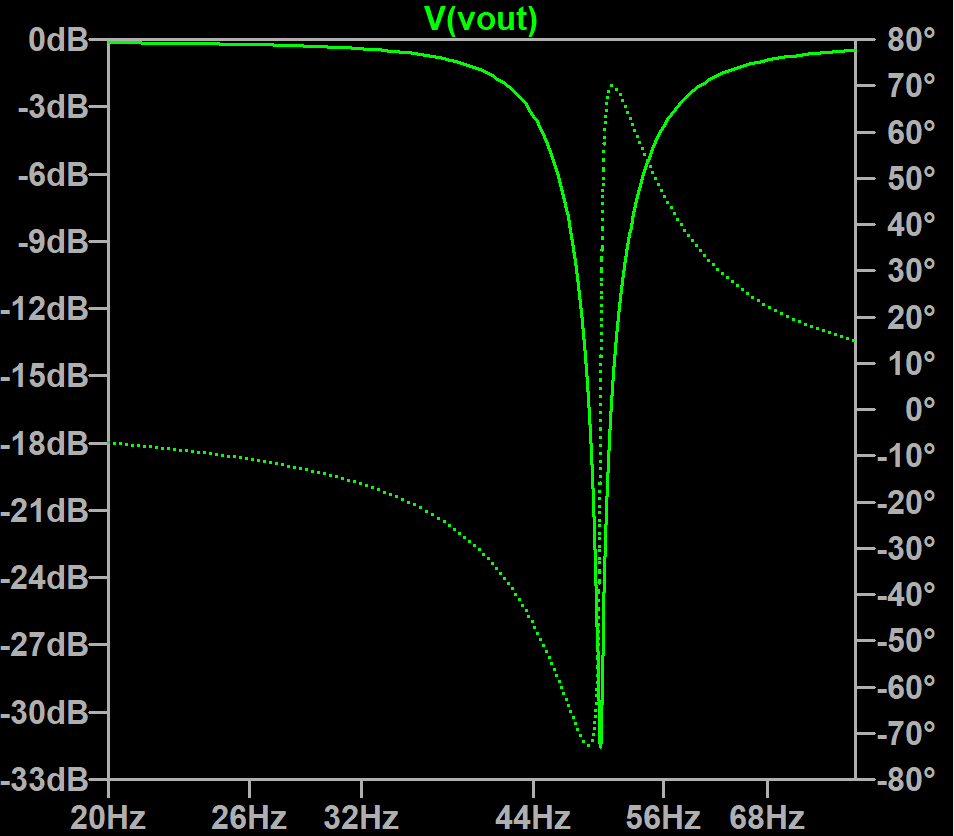

En la siguiente imágen se agregan los cursores para poder visualizar los puntos importantes de la respuesta en frecuencia.

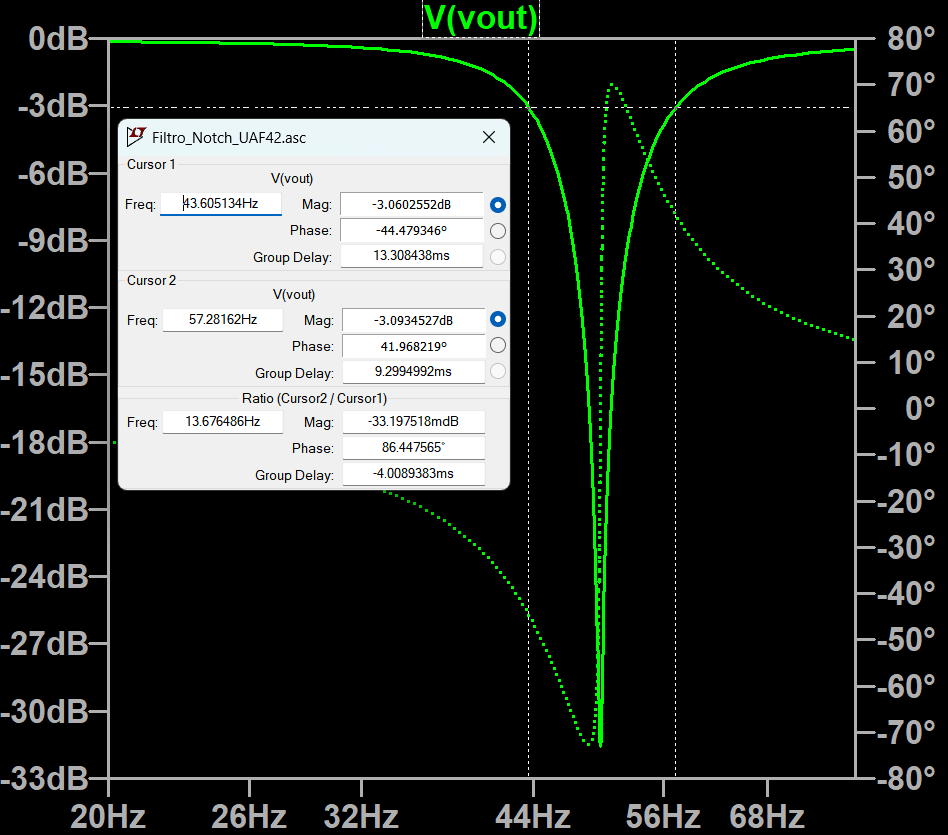

### Armado físico del circuito

Luego de todas las simulaciones, se procedio a armar este mismo circuito utilizando el software KiCad para confeccionar un PCB. Aunque luego se utilizó una placa multiperforada, por lo que este solo sirvió de guía para realizar las conexiones.
En la siguiente imágen se encuentra el esquemático realizado en kicad.

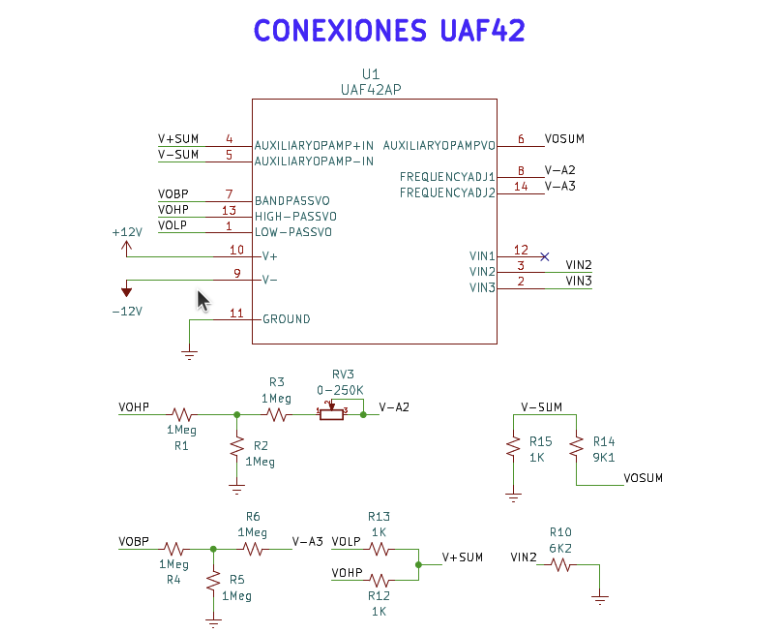

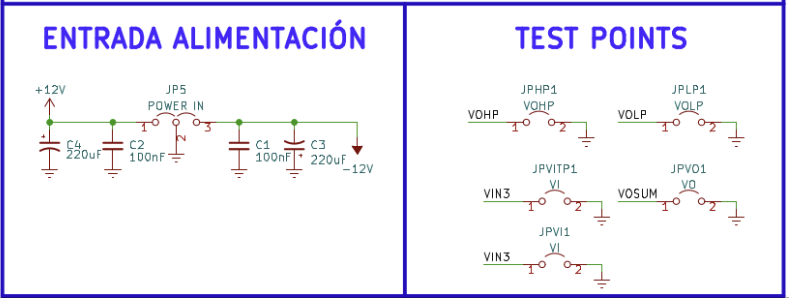


### Ensayo en laboratorio

En el laboratorio separamos las mediciones, en donde la primera estaba compuesta por medición con oscilocopio y la segunda con un analizador de audio. En la siguiente imágen podemos ver la conexiones que se utilizaron para medir con el osciloscopio.

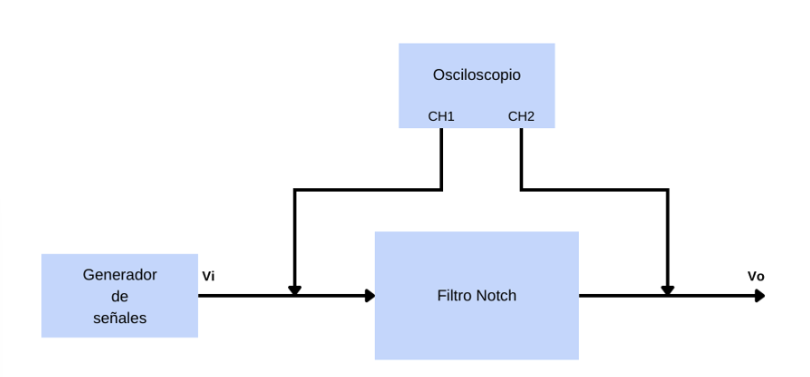



#### Mediciones realizadas

En esta primer etapa, luego de compensar las puntas del osciloscopio, se realizarón las siguientes mediciones:

    1. Medición de tensión RMS de la señal de entrada
    2. Medición de tensión RMS de la señal de salida
    3. Medición del retardo de fase


Con los primeros dos valores se calcula el módulo de la transferencia simplemente dividiendo el valor de salida por el del entrada, luego a este valor se lo puede logaritmar para obtener la atenuación en dB. Cabe destacar que como se trata de un filtro notch la atenuación en el pozo es muy grande por lo que la señal de salida será muy pequeña y puede tener ruido, por lo que se decidió utilizar la tensión RMS del ciclo para disminuir el ruido en las mediciones.


Meter datos obtenidos


### Conclusiones
#### Diseño del filtro
Fue una linda experiencia el hecho de poder llevar toda la teoría vista en el cuatrimestre a una práctiva tangible. En nuestro caso el filtro Notch, no nos llevo un gran desarrollo matemático para poder conseguir la transferencia del mismo. Pero si se presentaron dificultades a la hora de realizar la sintesis dado que los capacitores internos del UAF42 son de bajo valor, y esto nos condiciono a la hora de realizar la elección de los valores de resistencia. A pesar de esta dificultad, luego de analizarlo un tiempo, pudimos salir adelante y completar el laboratorio.

#### Armado fisico
En este punto dado que hace tiempo no realizabamos una placa, subestimamos el tiempo que llevaria la confección de la misma. Tendríamos que haber verificado que el filtro funcionaba al menos un día antes del laboratorio. Si bien el día del laboratorio nos alcanzo el tiempo, no estuvo bueno tener que arreglar el filtro en el momento donde deberíamos estar midiendo.

#### Conclusiones generales del trabajo
En general fue un lindo aprendizaje y una experiencia que repetiria nuevamente, más que nada el volver a tener contacto con circuitos reales, para llevar a la realidad la simulación y la teoría. Si bien entiendo que el tiempo que tenemos es finito y estas prácticas llevan tiempo, creo que son un paso fundamental para fijar conceptos.